In [2]:
print("bin tree")

bin tree


In [ ]:
#  pip install matplotlib networkx
# matplotlib is a popular library to draw all kinds of diagrams
import matplotlib.pyplot as plt
import networkx as nx


# Helper function to "print" trees
def draw_tree(tree):
    graph = nx.DiGraph()
    pos = {}

    # in walks from node to node, by recursively calling the children of a node
    # then it adds coordinates where to draw the shapes
    def add_edges(node, x=0, y=0, layer=1):
        if node is not None:
            graph.add_node(node.value)
            pos[node.value] = (x, y)
            if node.left:
                graph.add_edge(node.value, node.left.value)
                add_edges(node.left, x - 1 / 2**layer, y - 1, layer + 1)
            if node.right:
                graph.add_edge(node.value, node.right.value)
                add_edges(node.right, x + 1 / 2**layer, y - 1, layer + 1)

    add_edges(tree.root)

    plt.figure(figsize=(8, 5))
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_size=1000,
        node_color="green",
        font_size=7,
        font_weight="bold",
        arrows=False,
    )
    plt.show()

In [ ]:
# The building block of our tree data structure
# Like a node in a linked list, each TreeNode is a container for
# a value and references to up to two other TreeNodes (left and right)
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

In [ ]:
class BinaryTree:
    # create a new BinaryTree; it must have a root node
    def __init__(self, root_value):
        self.root = TreeNode(root_value)

    # Attach a new node left to a given one
    # current node can be the root, or any other node in the tree
    def insert_left(self, current_node, value):
        new_node = TreeNode(value)
        # When left is empty, attach it there
        if current_node.left is None:
            current_node.left = new_node
        else:
            # When there already is a left node,
            # attach the old left to the new node, and the new node to current (target)
            new_node.left = current_node.left
            current_node.left = new_node

    def insert_right(self, current_node, new_value):
        new_node = TreeNode(new_value)
        if current_node.right is None:
            current_node.right = new_node
        else:
            new_node.right = current_node.right
            current_node.right = new_node

In [ ]:
# bt = BinaryTree(1)
# print(bt.root.right)
# bt.insert_left(bt.root, 2)
# print(bt.root.left.value)
# bt.insert_left(bt.root, 3)
# print(bt.root.left.value)
# bt.insert_left(bt.root, 4)

None
2
3


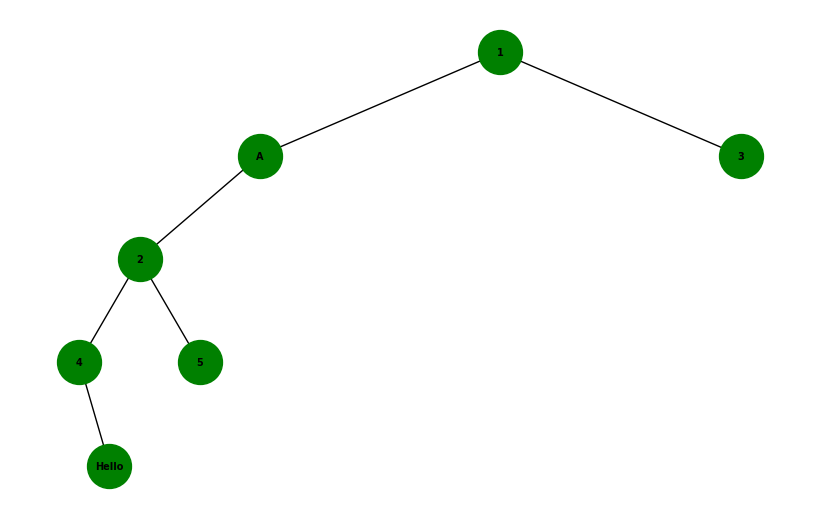

In [36]:
bt = BinaryTree(1)
bt.insert_left(bt.root, 2)
bt.insert_right(bt.root, 3)
bt.insert_left(bt.root.left, 4)
bt.insert_right(bt.root.left, 5)
bt.insert_left(bt.root, "A")

node_four = bt.root.left.left.left
bt.insert_right(node_four, "Hello")

draw_tree(bt)